In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('solar_train.csv')
test_df = pd.read_csv('solar_test.csv')

In [3]:
train_df.head()

,Id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation
0,4152,1473879005,9/14/2016 12:00:00 AM,08:50:05,57,30.45,68,26.70,4.50,06:10:00,18:26:00,680.04
1,13047,1476293121,10/12/2016 12:00:00 AM,07:25:21,50,30.47,96,144.96,10.12,06:16:00,18:02:00,277.37
2,7420,1477993220,10/31/2016 12:00:00 AM,23:40:20,47,30.48,56,119.52,3.37,06:23:00,17:49:00,1.29
3,6508,1473013505,9/4/2016 12:00:00 AM,08:25:05,57,30.47,93,38.61,2.25,06:08:00,18:35:00,544.75
4,29110,1481885434,12/16/2016 12:00:00 AM,00:50:34,41,30.23,103,177.55,2.25,06:50:00,17:46:00,1.22


# Data Information and Description :

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26148 entries, 0 to 26147
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      26148 non-null  int64  
 1   UNIXTime                26148 non-null  int64  
 2   Data                    26148 non-null  object 
 3   Time                    26148 non-null  object 
 4   Temperature             26148 non-null  int64  
 5   Pressure                26148 non-null  float64
 6   Humidity                26148 non-null  int64  
 7   WindDirection(Degrees)  26148 non-null  float64
 8   Speed                   26148 non-null  float64
 9   TimeSunRise             26148 non-null  object 
 10  TimeSunSet              26148 non-null  object 
 11  Radiation               26148 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 2.4+ MB


In [5]:
train_df = train_df.rename({'Data': 'Date'}, axis = 1)
train_df['date']=train_df['Date'].str.split(' ').str.get(0)
train_df['Datetime'] = pd.to_datetime(train_df['date'].apply(str)+' '+train_df['Time']) #Datetime column is of type datetime64
train_df['Hour_Minute'] = train_df['Datetime'].dt.strftime('%H:%M')
train_df['Hour'] = train_df['Datetime'].dt.strftime('%H')
train_df['Datetime']=sorted(train_df['Datetime'])

In [6]:
train_df=train_df.drop(columns=['UNIXTime', 'Date', 'date', 'Time'])
train_df=train_df.set_index('Datetime')


train_df['TimeSunSet']=pd.to_datetime(train_df['TimeSunSet'], format = "%H:%M:%S")
train_df['TimeSunRise']=pd.to_datetime(train_df['TimeSunRise'], format = "%H:%M:%S")
train_df['DayLength'] = train_df['TimeSunSet'] - train_df['TimeSunRise']
train_df['DayLength'] = train_df['DayLength'].dt.total_seconds().floordiv(60)
train_df['month']=train_df.index.month

In [7]:
train_df.head()

,Id,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation,Hour_Minute,Hour,DayLength,month
Datetime,,,,,,,,,,,,,
2016-09-01 00:00:08,4152,57,30.45,68,26.70,4.50,1900-01-01 06:10:00,1900-01-01 18:26:00,680.04,08:50,08,736.0,9
2016-09-01 00:05:10,13047,50,30.47,96,144.96,10.12,1900-01-01 06:16:00,1900-01-01 18:02:00,277.37,07:25,07,706.0,9
2016-09-01 00:25:05,7420,47,30.48,56,119.52,3.37,1900-01-01 06:23:00,1900-01-01 17:49:00,1.29,23:40,23,686.0,9
2016-09-01 00:30:09,6508,57,30.47,93,38.61,2.25,1900-01-01 06:08:00,1900-01-01 18:35:00,544.75,08:25,08,747.0,9
2016-09-01 00:45:04,29110,41,30.23,103,177.55,2.25,1900-01-01 06:50:00,1900-01-01 17:46:00,1.22,00:50,00,656.0,9


<AxesSubplot:xlabel='Temperature', ylabel='Radiation'>

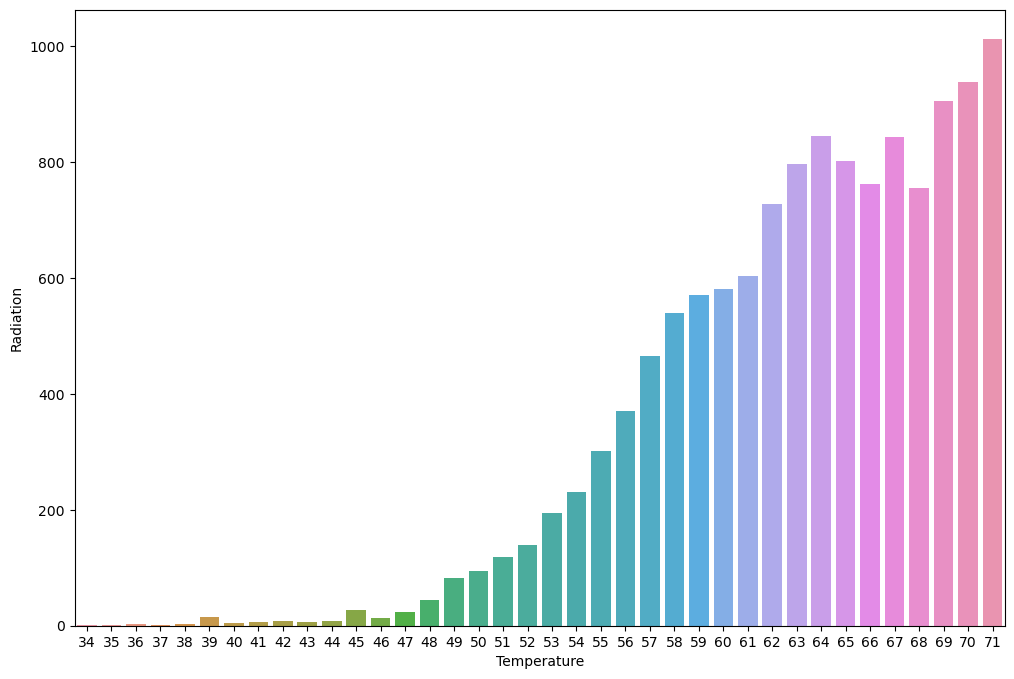

In [8]:
plt.figure(figsize=(12,8))
sns.barplot(data = train_df, x = 'Temperature', y = 'Radiation', ci = None)

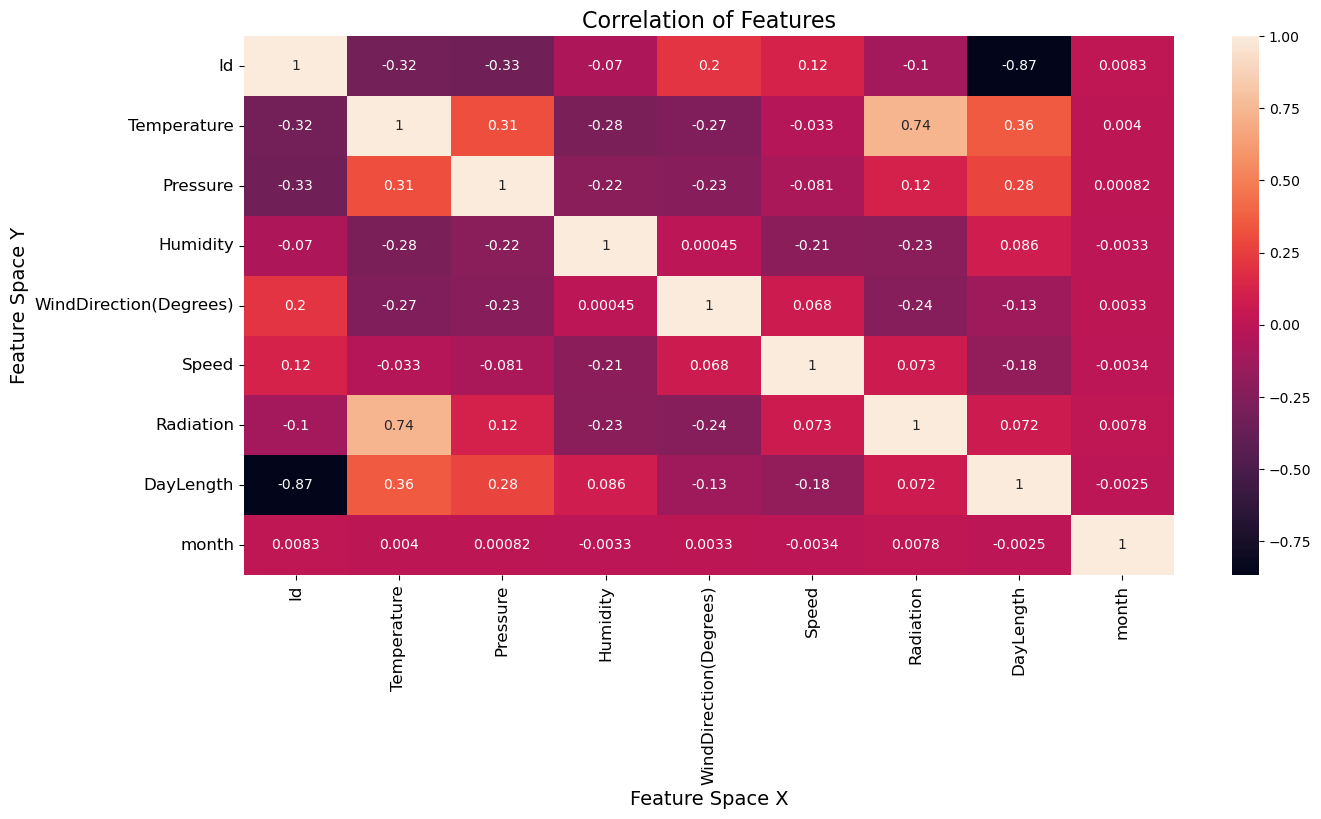

In [9]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(data=train_df.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

In [10]:
train_df.skew()

Id                       -0.002733
Temperature               0.517641
Pressure                 -1.235213
Humidity                 -0.774669
WindDirection(Degrees)    0.562866
Speed                     1.499486
Radiation                 1.358960
Hour                      0.001671
DayLength                 0.459041
month                    -0.016609
dtype: float64

In [11]:
train_df.drop(['Id', 'month', 'Hour', 'Hour_Minute', 'TimeSunSet', 'TimeSunRise', 'WindDirection(Degrees)', 'Speed'], axis = 1, inplace = True)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26148 entries, 2016-09-01 00:00:08 to 2016-12-31 23:55:01
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  26148 non-null  int64  
 1   Pressure     26148 non-null  float64
 2   Humidity     26148 non-null  int64  
 3   Radiation    26148 non-null  float64
 4   DayLength    26148 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 1.2 MB


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26148 entries, 2016-09-01 00:00:08 to 2016-12-31 23:55:01
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  26148 non-null  int64  
 1   Pressure     26148 non-null  float64
 2   Humidity     26148 non-null  int64  
 3   Radiation    26148 non-null  float64
 4   DayLength    26148 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 1.2 MB


Temperature


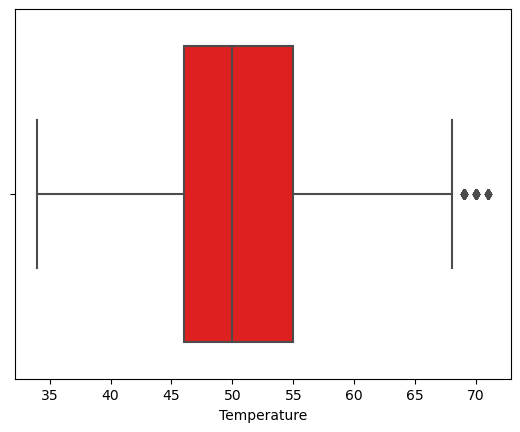

Pressure


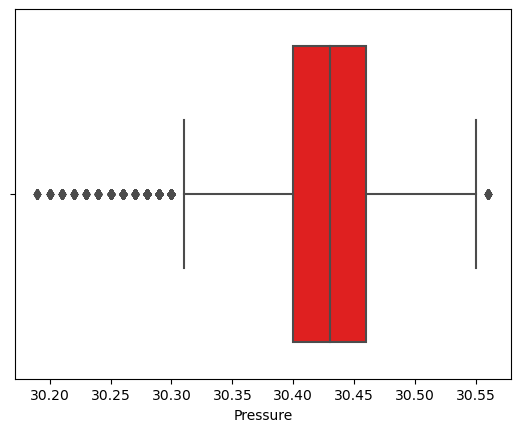

Humidity


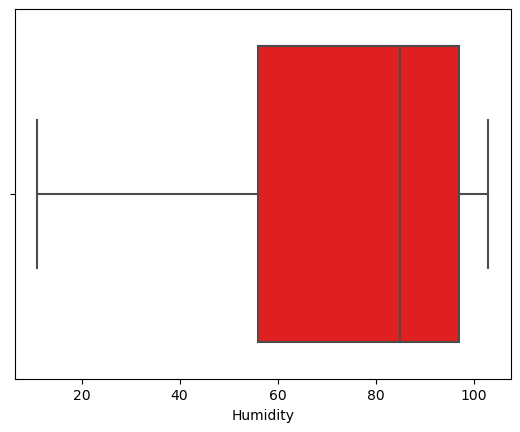

Radiation


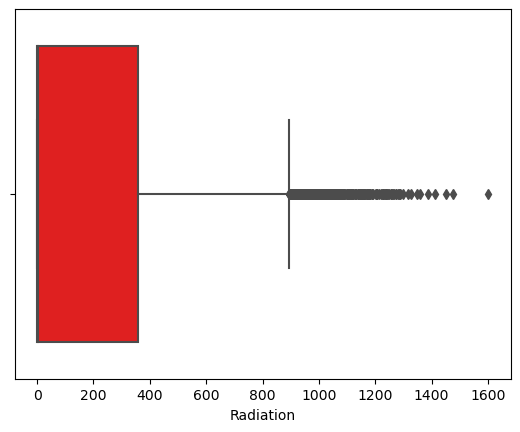

DayLength


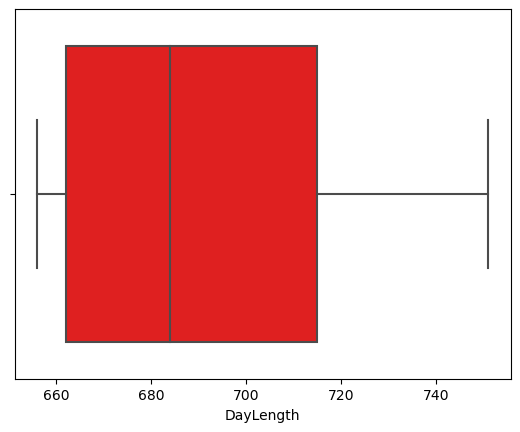

In [14]:
for col in train_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

# Log Transformation to handle outliers :

In [15]:
train_df['L_Temp'] = np.log(train_df['Temperature'])
train_df['L_pressure'] =  np.log(train_df['Pressure'])
train_df['L_Radiation'] = np.log(train_df['Radiation'])

In [16]:
train_df.drop(['Temperature', 'Pressure', 'Radiation'], axis = 1, inplace = True)

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26148 entries, 2016-09-01 00:00:08 to 2016-12-31 23:55:01
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Humidity     26148 non-null  int64  
 1   DayLength    26148 non-null  float64
 2   L_Temp       26148 non-null  float64
 3   L_pressure   26148 non-null  float64
 4   L_Radiation  26148 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.2 MB


# Train-Test Split :

In [18]:
x = train_df.drop('L_Radiation', axis = 1)
y = train_df['L_Radiation']

In [19]:
x

,Humidity,DayLength,L_Temp,L_pressure
Datetime,,,,
2016-09-01 00:00:08,68,736.0,4.043051,3.416086
2016-09-01 00:05:10,96,706.0,3.912023,3.416743
2016-09-01 00:25:05,56,686.0,3.850148,3.417071
2016-09-01 00:30:09,93,747.0,4.043051,3.416743
2016-09-01 00:45:04,103,656.0,3.713572,3.408835
...,...,...,...,...
2016-12-31 23:35:02,96,657.0,3.912023,3.410487
2016-12-31 23:40:01,100,742.0,3.784190,3.413455
2016-12-31 23:45:04,64,723.0,3.871201,3.415100


In [20]:
y

Datetime
2016-09-01 00:00:08    6.522152
2016-09-01 00:05:10    5.625352
2016-09-01 00:25:05    0.254642
2016-09-01 00:30:09    6.300327
2016-09-01 00:45:04    0.198851
                         ...   
2016-12-31 23:35:02    5.376620
2016-12-31 23:40:01    0.385262
2016-12-31 23:45:04    0.182322
2016-12-31 23:50:03    6.490906
2016-12-31 23:55:01    0.165514
Name: L_Radiation, Length: 26148, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42, shuffle = True)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20918, 4)
(5230, 4)
(20918,)
(5230,)


# Standard Scaler:

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [24]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 1. LinearRegression :

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [26]:
model.fit(x_train, y_train)

LinearRegression()

In [27]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [28]:
print('test', model.score(x_test, y_test))

test 0.5919058634828571


In [29]:
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
RMSE_lr_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_lr_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [31]:
print('RMSE for train data is :', RMSE_lr_train)
print('RMSE for test data is :', RMSE_lr_test)

RMSE for train data is : 1.7695186130606142
RMSE for test data is : 1.7628277258385159


In [32]:
r2_lr_train = r2_score(y_train, y_pred_train)
r2_lr_test = r2_score(y_test, y_pred_test)
print('R2 score for train data is :', r2_lr_train)
print('R2 score for test data is :', r2_lr_test)

R2 score for train data is : 0.592176457321979
R2 score for test data is : 0.5919058634828571


<AxesSubplot:xlabel='L_Radiation'>

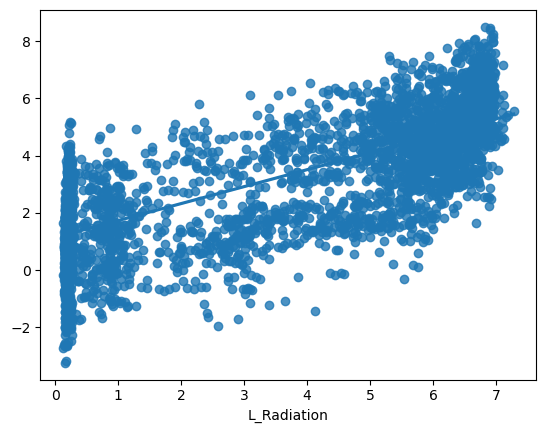

In [33]:
sns.regplot(y_test, y_pred_test)

# 2. RandomForestRegressor :

In [37]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

In [38]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [39]:
y_pred_rfr_train = rfr.predict(x_train)
y_pred_rfr_test = rfr.predict(x_test)

In [40]:
print('test', rfr.score(x_test, y_test))

test 0.9134779991188472


In [41]:
RMSE_rfr_train = np.sqrt(mean_squared_error(y_train, y_pred_rfr_train))
RMSE_rfr_test = np.sqrt(mean_squared_error(y_test, y_pred_rfr_test))

In [42]:
print('RMSE for train data is :', RMSE_rfr_train)
print('RMSE for test data is :', RMSE_rfr_test)

RMSE for train data is : 0.5198362944922095
RMSE for test data is : 0.8116951895715907


In [43]:
r2_rfr_train = r2_score(y_train, y_pred_train)
r2_rfr_test = r2_score(y_test, y_pred_test)
print('R2 score for train data is :', r2_rfr_train)
print('R2 score for test data is :', r2_rfr_test)

R2 score for train data is : 0.592176457321979
R2 score for test data is : 0.5919058634828571


<AxesSubplot:xlabel='L_Radiation'>

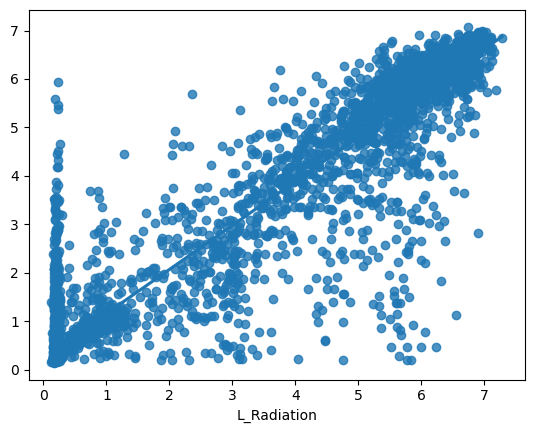

In [44]:
sns.regplot(y_test, y_pred_rfr_test)

# 3. VotingRegressor :

In [45]:
from sklearn.ensemble import VotingRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
r1 = RandomForestRegressor()
r2 = DecisionTreeRegressor()
r3 =LinearRegression()

er = VotingRegressor([('rf', r1), ('dt', r2), ('lr', r3)])


In [46]:
er.fit(x_train, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('dt', DecisionTreeRegressor()),
                            ('lr', LinearRegression())])

In [47]:
y_pred_vote_train = er.predict(x_train)
y_pred_vote_test = er.predict(x_test)

In [48]:
print('test', er.score(x_test, y_test))

test 0.8770529662380087


In [49]:
RMSE_er_train = np.sqrt(mean_squared_error(y_train, y_pred_vote_train))
RMSE_er_test = np.sqrt(mean_squared_error(y_test, y_pred_vote_test))

In [50]:
print('RMSE for train data is :', RMSE_er_train)
print('RMSE for test data is :', RMSE_er_test)

RMSE for train data is : 0.7637716345310684
RMSE for test data is : 0.9675840991079714


<AxesSubplot:xlabel='L_Radiation'>

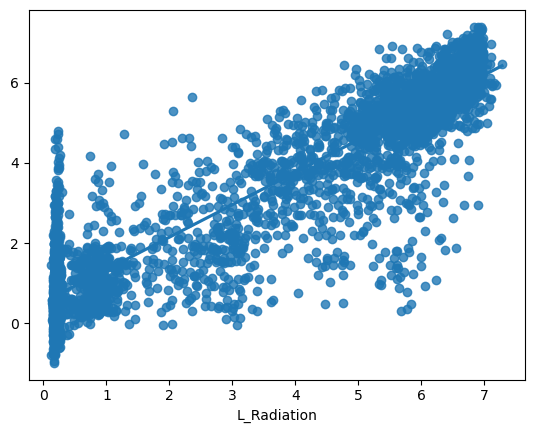

In [51]:
sns.regplot(y_test, y_pred_vote_test)

# 4. Bagging Regressor :

In [52]:
from sklearn.neighbors import KNeighborsRegressor
r1 = KNeighborsRegressor()

from sklearn.ensemble import BaggingRegressor

regr_BAG = BaggingRegressor(base_estimator=r1, n_estimators=10)

regr_BAG.fit(x_train,y_train)


BaggingRegressor(base_estimator=KNeighborsRegressor())

In [53]:
y_pred_bag_train = regr_BAG.predict(x_train)
y_pred_bag_test = regr_BAG.predict(x_test)

In [54]:
print('test', regr_BAG.score(x_test, y_test))

test 0.8721063501220314


In [55]:
RMSE_bag_train = np.sqrt(mean_squared_error(y_train, y_pred_bag_train))
RMSE_bag_test = np.sqrt(mean_squared_error(y_test, y_pred_bag_test))

In [56]:
print('RMSE for train data is :', RMSE_bag_train)
print('RMSE for test data is :', RMSE_bag_test)

RMSE for train data is : 0.8078447840007009
RMSE for test data is : 0.9868569087464485


In [57]:
r2_bag_train = r2_score(y_train, y_pred_bag_train)
r2_bag_test = r2_score(y_test, y_pred_bag_test)
print('R2 score for train data is :', r2_bag_train)
print('R2 score for test data is :', r2_bag_test)

R2 score for train data is : 0.91500020604548
R2 score for test data is : 0.8721063501220314


<AxesSubplot:xlabel='L_Radiation'>

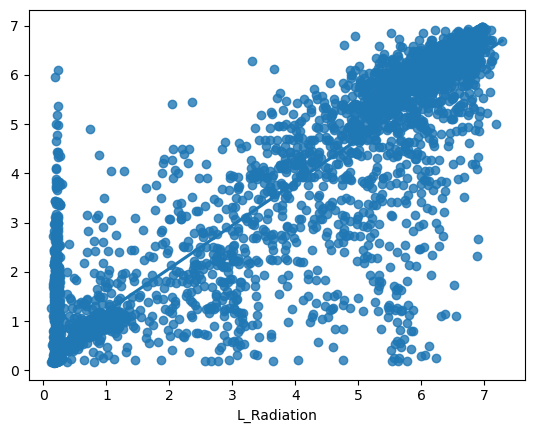

In [58]:
sns.regplot(y_test, y_pred_bag_test)

# 5. XGBRegressor :

In [59]:
from xgboost import XGBRegressor

In [60]:
xgb = XGBRegressor()

In [61]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [62]:
y_pred_xg_train = xgb.predict(x_train)
y_pred_xg_test = xgb.predict(x_test)

In [63]:
print('test', xgb.score(x_test, y_test))

test 0.8803993824845097


In [64]:
RMSE_xg_train = np.sqrt(mean_squared_error(y_train, y_pred_xg_train))
RMSE_xg_test = np.sqrt(mean_squared_error(y_test, y_pred_xg_test))

In [65]:
print('RMSE for train data is :', RMSE_xg_train)
print('RMSE for test data is :', RMSE_xg_test)

RMSE for train data is : 0.8491002872837018
RMSE for test data is : 0.9543252308611134


In [66]:
r2_xg_train = r2_score(y_train, y_pred_xg_train)
r2_xg_test = r2_score(y_test, y_pred_xg_test)
print('R2 score for train data is :', r2_xg_train)
print('R2 score for test data is :', r2_xg_test)

R2 score for train data is : 0.9060968852121005
R2 score for test data is : 0.8803993824845097


# 6. AdaBoostRegressor :

In [67]:
from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

regr = AdaBoostRegressor(base_estimator = rf, n_estimators=100)
regr.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(), n_estimators=100)

In [68]:
y_pred_ADA_test= regr.predict(x_test)

In [69]:
RMSE_ada_test = np.sqrt(mean_squared_error(y_test, y_pred_ADA_test))
print('RMSE for test data is :', RMSE_ada_test)

RMSE for test data is : 0.8688931820301956


In [70]:
test_df = pd.read_csv('solar_test.csv')

In [71]:
test_df.head()

,Id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,22107,1478720107,11/9/2016 12:00:00 AM,09:35:07,59,30.47,44,312.67,3.37,06:28:00,17:45:00
1,3780,1474063503,9/16/2016 12:00:00 AM,12:05:03,59,30.48,83,38.01,6.75,06:10:00,18:25:00
2,13651,1476109221,10/10/2016 12:00:00 AM,04:20:21,47,30.39,78,213.62,5.62,06:16:00,18:03:00
3,30473,1481475056,12/11/2016 12:00:00 AM,06:50:56,45,30.40,98,176.63,4.50,06:47:00,17:44:00
4,9084,1477493117,10/26/2016 12:00:00 AM,04:45:17,45,30.40,34,175.89,6.75,06:21:00,17:52:00


In [72]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6538 entries, 0 to 6537
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      6538 non-null   int64  
 1   UNIXTime                6538 non-null   int64  
 2   Data                    6538 non-null   object 
 3   Time                    6538 non-null   object 
 4   Temperature             6538 non-null   int64  
 5   Pressure                6538 non-null   float64
 6   Humidity                6538 non-null   int64  
 7   WindDirection(Degrees)  6538 non-null   float64
 8   Speed                   6538 non-null   float64
 9   TimeSunRise             6538 non-null   object 
 10  TimeSunSet              6538 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 562.0+ KB


In [73]:
test_df = test_df.rename({'Data': 'Date'}, axis = 1)
test_df['date']=test_df['Date'].str.split(' ').str.get(0)
test_df['Datetime'] = pd.to_datetime(test_df['date'].apply(str)+' '+test_df['Time']) #Datetime column is of type datetime64
test_df['Hour_Minute'] =test_df['Datetime'].dt.strftime('%H:%M')
test_df['Hour'] = test_df['Datetime'].dt.strftime('%H')
test_df['Datetime']=sorted(test_df['Datetime'])

In [74]:
test_df.head()

,Id,UNIXTime,Date,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,date,Datetime,Hour_Minute,Hour
0,22107,1478720107,11/9/2016 12:00:00 AM,09:35:07,59,30.47,44,312.67,3.37,06:28:00,17:45:00,11/9/2016,2016-09-01 00:20:06,09:35,09
1,3780,1474063503,9/16/2016 12:00:00 AM,12:05:03,59,30.48,83,38.01,6.75,06:10:00,18:25:00,9/16/2016,2016-09-01 01:10:06,12:05,12
2,13651,1476109221,10/10/2016 12:00:00 AM,04:20:21,47,30.39,78,213.62,5.62,06:16:00,18:03:00,10/10/2016,2016-09-01 01:25:06,04:20,04
3,30473,1481475056,12/11/2016 12:00:00 AM,06:50:56,45,30.40,98,176.63,4.50,06:47:00,17:44:00,12/11/2016,2016-09-01 01:55:04,06:50,06
4,9084,1477493117,10/26/2016 12:00:00 AM,04:45:17,45,30.40,34,175.89,6.75,06:21:00,17:52:00,10/26/2016,2016-09-01 02:05:05,04:45,04


In [75]:
test_df=test_df.drop(columns=['UNIXTime', 'Date', 'date', 'Time'])
test_df=test_df.set_index('Datetime')


test_df['TimeSunSet']=pd.to_datetime(test_df['TimeSunSet'], format = "%H:%M:%S")
test_df['TimeSunRise']=pd.to_datetime(test_df['TimeSunRise'], format = "%H:%M:%S")
test_df['month']=test_df.index.month
test_df['DayLength'] =test_df['TimeSunSet'] - test_df['TimeSunRise']
test_df['DayLength'] = test_df['DayLength'].dt.total_seconds().floordiv(60)


In [76]:
test_df.head()

,Id,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Hour_Minute,Hour,month,DayLength
Datetime,,,,,,,,,,,,
2016-09-01 00:20:06,22107,59,30.47,44,312.67,3.37,1900-01-01 06:28:00,1900-01-01 17:45:00,09:35,09,9,677.0
2016-09-01 01:10:06,3780,59,30.48,83,38.01,6.75,1900-01-01 06:10:00,1900-01-01 18:25:00,12:05,12,9,735.0
2016-09-01 01:25:06,13651,47,30.39,78,213.62,5.62,1900-01-01 06:16:00,1900-01-01 18:03:00,04:20,04,9,707.0
2016-09-01 01:55:04,30473,45,30.40,98,176.63,4.50,1900-01-01 06:47:00,1900-01-01 17:44:00,06:50,06,9,657.0
2016-09-01 02:05:05,9084,45,30.40,34,175.89,6.75,1900-01-01 06:21:00,1900-01-01 17:52:00,04:45,04,9,691.0


In [77]:
test_df.drop(['Id', 'month', 'Hour', 'Hour_Minute', 'TimeSunSet', 'TimeSunRise', 'WindDirection(Degrees)', 'Speed'], axis = 1, inplace = True)

In [78]:
test_df.head()

,Temperature,Pressure,Humidity,DayLength
Datetime,,,,
2016-09-01 00:20:06,59,30.47,44,677.0
2016-09-01 01:10:06,59,30.48,83,735.0
2016-09-01 01:25:06,47,30.39,78,707.0
2016-09-01 01:55:04,45,30.40,98,657.0
2016-09-01 02:05:05,45,30.40,34,691.0


Temperature


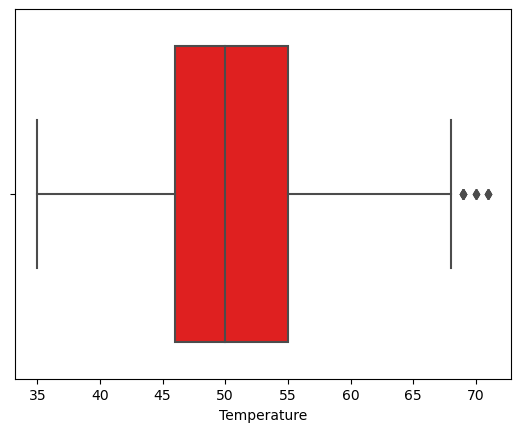

Pressure


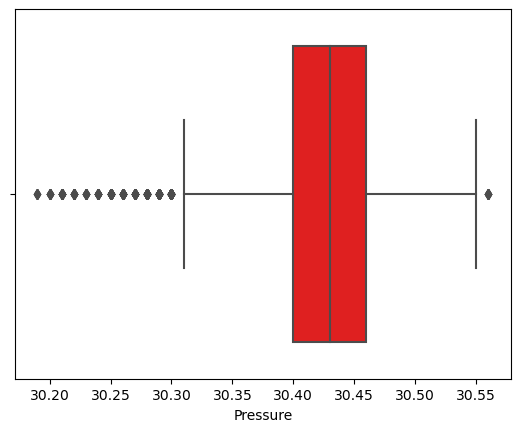

Humidity


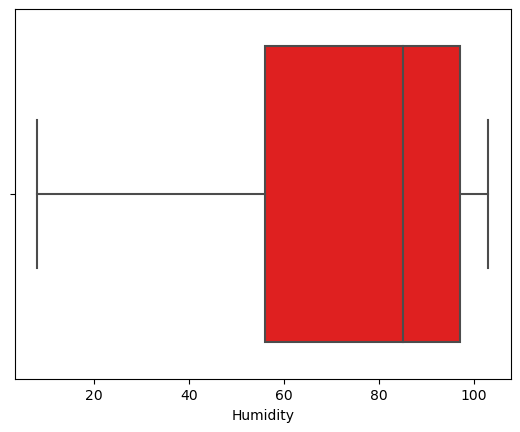

DayLength


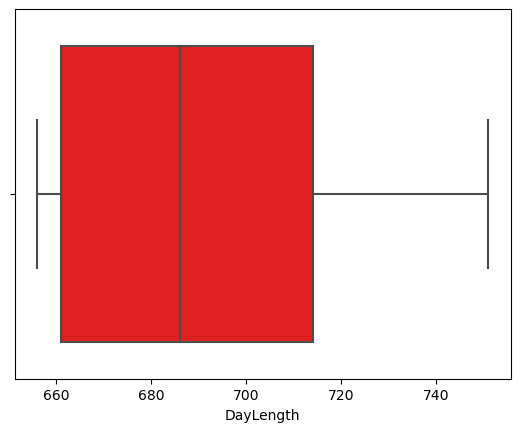

In [79]:
for col in test_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = test_df[col], data = test_df, color = 'red')
    plt.show()

In [80]:
test_df['L_temperature'] = np.log(test_df['Temperature'])
test_df['L_pressure'] = np.log(test_df['Pressure'])

In [81]:
test_df.drop(['Temperature', 'Pressure'], axis = 1, inplace = True)

In [82]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6538 entries, 2016-09-01 00:20:06 to 2016-12-31 22:55:01
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Humidity       6538 non-null   int64  
 1   DayLength      6538 non-null   float64
 2   L_temperature  6538 non-null   float64
 3   L_pressure     6538 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 255.4 KB


In [86]:
predicted_test = regr.predict(test_df)

In [87]:
predicted_test

array([5.65843149, 5.65843149, 5.65843149, ..., 5.65843149, 5.65843149,
       5.65843149])

In [88]:
list(zip(y_test, predicted_test))

[(6.50388390021243, 5.658431488917253),
 (0.2151113796169455, 5.658431488917253),
 (0.20701416938432612, 5.658431488917253),
 (2.0881534822818573, 5.658431488917253),
 (0.2151113796169455, 5.658431488917253),
 (0.19885085874516517, 5.658431488917253),
 (0.37843643572024505, 5.658431488917253),
 (6.306202291583189, 5.658431488917253),
 (0.2151113796169455, 5.658431488917253),
 (0.20701416938432612, 5.658431488917253),
 (0.9631743177730056, 5.658431488917253),
 (0.20701416938432612, 5.658431488917253),
 (0.2151113796169455, 5.658431488917253),
 (0.20701416938432612, 5.658431488917253),
 (0.7608058290337602, 5.658431488917253),
 (6.67271625625486, 5.658431488917253),
 (0.2151113796169455, 5.658431488917253),
 (4.8946256849890135, 5.658431488917253),
 (6.740956616241468, 5.658431488917253),
 (0.22314355131420976, 5.658431488917253),
 (6.136603312774221, 5.658431488917253),
 (0.1906203596086497, 5.658431488917253),
 (0.17395330712343798, 5.658431488917253),
 (6.539441436504766, 5.6584314889

In [89]:
test_df['Radiation'] = predicted_test

In [90]:
test_df.head()

,Humidity,DayLength,L_temperature,L_pressure,Radiation
Datetime,,,,,
2016-09-01 00:20:06,44,677.0,4.077537,3.416743,5.658431
2016-09-01 01:10:06,83,735.0,4.077537,3.417071,5.658431
2016-09-01 01:25:06,78,707.0,3.850148,3.414114,5.658431
2016-09-01 01:55:04,98,657.0,3.806662,3.414443,5.658431
2016-09-01 02:05:05,34,691.0,3.806662,3.414443,5.658431


In [91]:
test_df.to_csv('submoission_solar.csv', index = False, header = False)